In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline

from collections import Counter

In [2]:
# Load training and test sets (assumes you have these in current working directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Inspect training set
train.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251,Target
0,1,0.998952,0.174118,0.999211,0.996460,0.133333,0.057143,0.000,0.0,0.0,...,0.0,0.0,0,0.612863,0.026812,0.522,0.217791,0.233629,0.540962,0.901355
1,2,0.999445,0.174118,0.999329,0.997079,0.133333,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.688941,0.075030,0.704,0.246119,0.143860,0.525384,0.913550
2,3,0.998759,0.000000,0.997260,0.996325,0.000000,0.085714,0.125,0.0,0.0,...,0.0,0.0,0,0.156863,0.436279,0.000,0.119091,0.162869,0.361124,0.884824
3,4,0.999619,0.174118,0.997969,0.997321,0.266667,0.057143,0.125,0.0,0.0,...,0.0,0.0,0,0.709647,0.075472,0.513,0.392743,0.377302,0.613776,0.977236
4,5,0.998278,0.174118,0.998427,0.996269,0.200000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.364235,0.041818,0.200,0.096297,0.166459,0.408322,0.921138


In [4]:
# Inspect test set
test.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,1,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,2,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,3,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,4,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,5,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


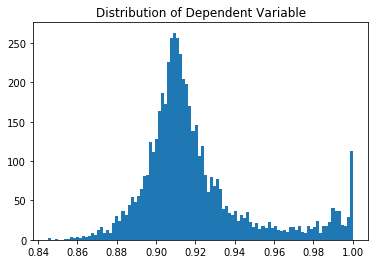

In [5]:
# Explore distribution of target
plt.hist(train['Target'], bins = 100)
plt.title("Distribution of Dependent Variable")
plt.show()

In [6]:
# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

In [7]:
# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

In [8]:
# Fit unregularized linear regression and see RMSE on training set
linReg = Lin_Reg()
linReg.fit(X_train, y_train)

print("Training RMSE: ", scoreRMSE(linReg, X_train, y_train))

Training RMSE:  0.02635316909856059


In [9]:
# Remove first column to make predictions
X_test = test.iloc[:, 1:]
y_train = train.iloc[:, -1]
X_test.head()

,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,Feat 10,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,0.166667,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


In [10]:
# Make predictions using linear regression model fitted above
predictions = linReg.predict(X_test)

In [11]:
# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

,Id,Predicted
0,1,0.934617
1,2,0.925089
2,3,0.922480
3,4,0.934118
4,5,0.926749


In [12]:
# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("sample_submission.csv", index=False)

In [13]:
############# MY CODE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
# check if these imports are used
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import math

In [14]:
# Note: to do a scatter_matrix i need to drastically cut features
#scatter_matrix(X_train)

In [15]:
# Set of shrinkage parameters
lambdas = [.001, .003, .005,.01, .04, .1,.2,.5,.75, 1, 5, 10, 50, 100, 500, 1000]

# Set of alphas for elastic net
alphs = [0.001,0.002,0.0023, 0.0025, 0.0027, 0.003, 0.005, 0.007, 0.01,0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9]  
# note: had warnings for convergence for 0 and 1, look into eps


# Initialize a 5-fold KFOLD object 
kfold5 = KFold(5, shuffle=True)

# Initialize a Ridge cross-validation object
ridgeCV_object = RidgeCV(alphas=(lambdas), cv=kfold5)

# Fit the training data with the CV object
lr_ridge = ridgeCV_object.fit(sm.add_constant(X_train), y_train)

# Initialize a Lasso cross-validation object
lassoCV_object = LassoCV(alphas= lambdas, cv=kfold5)

# Fit the training data with the CV object
lr_lasso = lassoCV_object.fit(X_train, y_train)

# Initialize a Lasso cross-validation object
elasticCV_object = ElasticNetCV(l1_ratio = alphs, alphas= lambdas, cv=kfold5)

# Fit the training data with the CV object
lr_elastic = elasticCV_object.fit(X_train, y_train)

In [16]:
lr_elastic.l1_ratio_

0.001

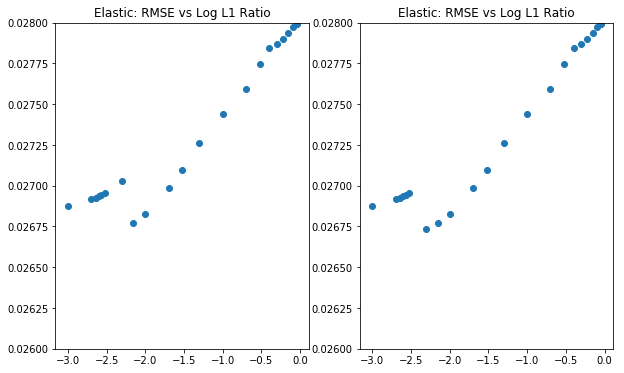

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

elastic_rmses = [] 
log_ratios = []

for ele in alphs:
    elastic_object = ElasticNetCV(l1_ratio = ele, alphas = lambdas, cv=kfold5)
    elastic = elastic_object.fit(X_train, y_train)
    elastic_rmses.append(scoreRMSE(elastic, X_train, y_train))
    log_ratios.append(math.log10(ele))
    
ax[0].set_ylim([0.026,0.028])
ax[0].scatter(log_ratios, elastic_rmses)
ax[0].set_title("Elastic: RMSE vs Log L1 Ratio");

elastic_rmses = [] 
log_ratios = []

for ele in alphs:
    elastic_object = ElasticNetCV(l1_ratio = ele, alphas = lambdas, cv=kfold5, random_state=150)
    elastic = elastic_object.fit(X_train, y_train)
    elastic_rmses.append(scoreRMSE(elastic, X_train, y_train))
    log_ratios.append(math.log10(ele))
    
ax[1].set_ylim([0.026,0.028])
ax[1].scatter(log_ratios, elastic_rmses)
ax[1].set_title("Elastic: RMSE vs Log L1 Ratio");
#ax.set_ylim((0.2,0.3))

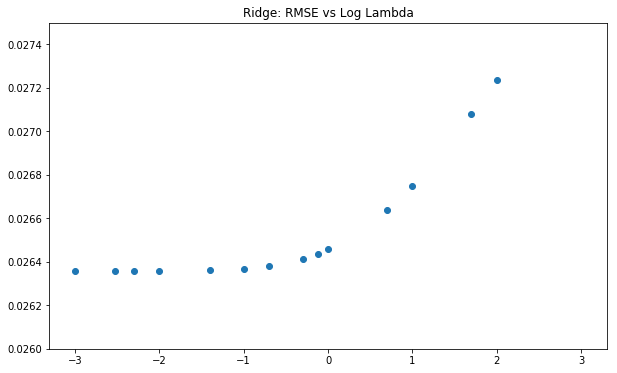

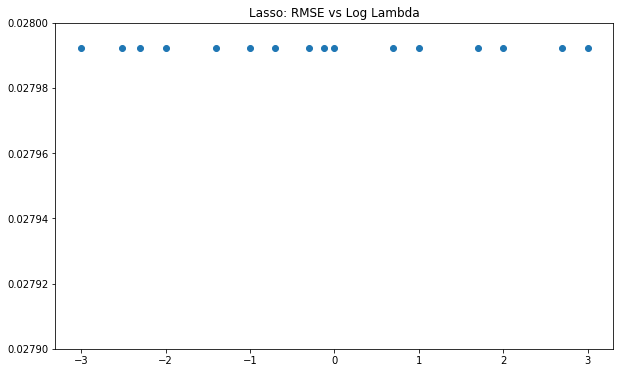

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ridge_rmses = [] 
log_lambdas = []

for ele in lambdas:
    ridge_object = Ridge(alpha=ele)
    ridge = ridge_object.fit(X_train, y_train)
    ridge_rmses.append(scoreRMSE(ridge, X_train, y_train))
    log_lambdas.append(math.log10(ele))
ax.set_ylim([0.026,0.0275])
ax.scatter(log_lambdas, ridge_rmses)
ax.set_title("Ridge: RMSE vs Log Lambda");
#ax.set_ylim((0.2,0.3))
fig, ax = plt.subplots(1, 1, figsize=(10,6))

lasso_rmses = [] 

for ele in lambdas:
    lasso_object = Lasso(alpha=ele)
    lasso = lasso_object.fit(X_train, y_train)
    lasso_rmses.append(scoreRMSE(lasso, X_train, y_train))
    
ax.set_ylim([0.0279,0.0280])
ax.scatter(log_lambdas, lasso_rmses)
ax.set_title("Lasso: RMSE vs Log Lambda"); 

# NOTE: L2 ERROR IS SQUARED, Should presence of outlier affect it?

In [19]:
# Initialize a Lasso cross-validation object
elasticCV_object = ElasticNetCV(l1_ratio = alphs, alphas= lambdas, cv=kfold5)

# Fit the training data with the CV object
lr_elastic = elasticCV_object.fit(X_train, y_train)

print("Training RMSE: ", scoreRMSE(lr_elastic, X_train, y_train))
predictions = lr_elastic.predict(X_test)

# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

# Save predictions to .csv file for upload to Kaggle
#sample_submission.to_csv("basic_elastic.csv", index=False)

Training RMSE:  0.026875730273388562


,Id,Predicted
0,1,0.927959
1,2,0.915888
2,3,0.921951
3,4,0.933666
4,5,0.923877


In [20]:
# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("basic_elastic_const.csv", index=False)

In [21]:
# dataset_x should be a pandas dataframe

## accepts dataset inputs as numpy arrays
def make_bootstrap_sample(dataset_X, dataset_y, size = None):
    """Returns a bootstrap sample of the given data and size
    
    Args:
        dataset_X: the Pandas dataframe of feature variables and values
        dataset_y: the column vector of response values
        size: the size of the Bootstrap sample with None as the default
    
    Returns:
        Returns a tuple containing a dataframe containing the Bootstrap X-values and a list of Bootstrap y-values
    """
    
    # by default return a bootstrap sample of the same size as the original dataset
    if not size: size = len(dataset_X)
    
    # if the X and y datasets aren't the same size, raise an exception
    if len(dataset_X) != len(dataset_y):
        raise Exception("Data size must match between dataset_X and dataset_y")
    
    # Store an ndarray of random indices
    inds_to_sample = np.random.choice(dataset_X.shape[0], size, replace = True)
    
    # Store the observations located at these indices in the Dataframe as the bootstrap sample data
    bootstrap_dataset_X = dataset_X.iloc[inds_to_sample]
    bootstrap_dataset_y = dataset_y.iloc[inds_to_sample]
    
    # return as a tuple the bootstrap samples of dataset_X as a pandas dataframe
    # and the bootstrap samples of dataset y as a numpy column vector
    return (bootstrap_dataset_X, bootstrap_dataset_y)
    
def calculate_coefficients(dataset_X, dataset_y, model):
    """Returns the Beta-coefficients of the given data fitted to the given model
    
    Args:
        dataset_X: the Pandas dataframe of feature variables and values
        dataset_y: the column vector of response values
        model: the model object to be fitted with the given data
    
    Returns:
        coefficients_dictionary: a dictionary containing the feature names as keys and the
        coefficients as values."""
    
    # Fit the data to the given model parameter
    model.fit(dataset_X, dataset_y)
    
    # Initalize dictionary of coefficents
    coefficients_dictionary = {}
    
    # Iterate through dataset coefficients and store them in the dictionary
    for index, val in enumerate(model.coef_):
        coefficients_dictionary[dataset_X.columns[index]] = val
    
    # return coefficients  in the variable  coefficients_dictionary as a dictionary
    # with the key being the name of the feature as a string
    # the value being the value of the coefficients
    # do not return the intercept as part of this
    return coefficients_dictionary

def get_significant_predictors(regression_coefficients, significance_level):
    """Returns the significant predictors from a model
    
    Args:
        regression_coefficients: a list of dictionaries containing the regression coefficients
        of models made from different samples
        significance_level: the alpha-level used to determine feature significance
    
    Returns:
        significant_coefficients: a list of the significant feature names
        """
        
    # initialize a DataFrame to contain a list of the column names 
    coefficient_values = pd.DataFrame(index=list(regression_coefficients[0].keys()))
    
    # Store all of the values from each bootstrap sample in a column
    for row, cur_sample in enumerate(regression_coefficients):
        coefficient_values[row] = cur_sample.values()
        
    # Transpose the DataFrame so that each row now represents one Bootstrap sample
    coefficient_values = coefficient_values.T
    
    # Initialize significant_coefficients to an empty list
    significant_coefficients = []
    
    # Store the upper and lower percentile bounds
    lower_bound = significance_level/2 * 100
    upper_bound = 100 - lower_bound

    # Iterate through all of coefficient_values and determine which coefficients are significant
    for index_column, col in enumerate(coefficient_values): 
        if not(((np.percentile(coefficient_values[col], lower_bound ) < 0)) & ((np.percentile(coefficient_values[col], upper_bound) > 0))):
            significant_coefficients.append(coefficient_values.columns[index_column])
    
    # return significant_coefficients
    return significant_coefficients

# Initialize the list of coefficients
boot_coefs = [np.nan]*500

# Create 500 Bootstrap samples
for i in range(500):
    boot_x, boot_y = make_bootstrap_sample(X_train, y_train)
    boot_coefs[i] = calculate_coefficients(boot_x, boot_y, Lin_Reg())

# Store the significant predictors
OLS_significant_bootstrap = get_significant_predictors(boot_coefs, 0.05)

# Print the significant predictors
print("\033[1mSignificant Predictors:\033[0m\n{0}".format(OLS_significant_bootstrap))

Significant Predictors:
['Feat 2', 'Feat 17', 'Feat 53', 'Feat 55', 'Feat 82', 'Feat 92', 'Feat 98', 'Feat 156', 'Feat 222', 'Feat 223', 'Feat 226', 'Feat 227', 'Feat 228', 'Feat 229', 'Feat 230', 'Feat 236', 'Feat 237', 'Feat 238', 'Feat 239', 'Feat 240', 'Feat 245', 'Feat 246', 'Feat 247']


In [22]:
X_train_selected = X_train[['Feat 2', 'Feat 17', 'Feat 36', 'Feat 53', 'Feat 55', 'Feat 82', 'Feat 92', 'Feat 98', 'Feat 156', 'Feat 222', 'Feat 223', 'Feat 226', 'Feat 227', 'Feat 228', 'Feat 229', 'Feat 230', 'Feat 236', 'Feat 237', 'Feat 238', 'Feat 239', 'Feat 240', 'Feat 245', 'Feat 246', 'Feat 247']]

In [23]:
train_selected = X_train_selected.copy()
train_selected["target"] = y_train

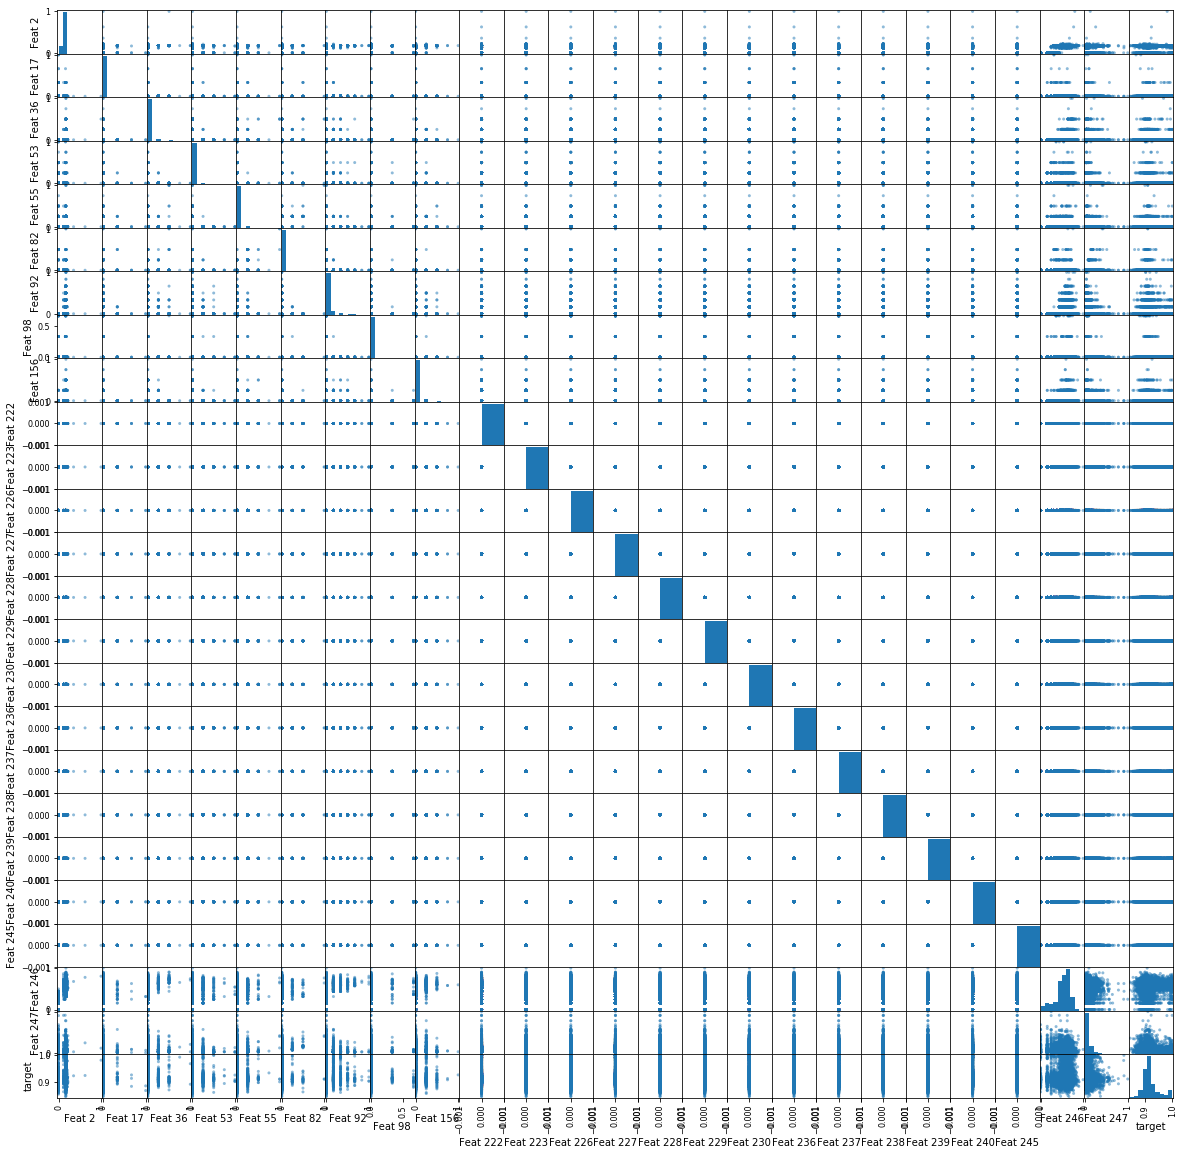

In [49]:
scatter_matrix(train_selected, figsize=(20,20));

In [29]:
# Fit the training data with the CV object. THese parameters seem weird
lr_elastic_sel = elasticCV_object.fit(X_train_selected, y_train)
print("Training RMSE: ", scoreRMSE(lr_elastic_sel, X_train_selected, y_train))

Training RMSE:  0.027650353493413257


In [30]:
lin_Reg_const = Lin_Reg()
lin_Reg_const.fit(sm.add_constant(X_train), y_train)

print("Training RMSE: ", scoreRMSE(lin_Reg_const, sm.add_constant(X_train), y_train))

Training RMSE:  0.026353165802327612


In [31]:
from statsmodels.regression import linear_model

In [32]:
results = sm.OLS(y_train, X_train).fit()


In [33]:
from statsmodels.stats.outliers_influence import OLSInfluence#.OLSInfluence.summary_frame

#results = sm.OLS().fit(X_train, y_train)
results.summary()
cooks_data = OLSInfluence(results).summary_frame()

/home/mkolor/jupyter_nb_directory/jupyter_nb_env/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/mkolor/jupyter_nb_directory/jupyter_nb_env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/mkolor/jupyter_nb_directory/jupyter_nb_env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/mkolor/jupyter_nb_directory/jupyter_nb_env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/mkolor/jupyter_nb_directory/jupyter_nb_env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  retur

KeyboardInterrupt: 

In [ ]:
cooks_data.to_csv("cooks_data.csv")

In [34]:
#cooks_data.sort_values(by="cooks_d", ascending=False).cooks_d
cooks_data = pd.read_csv("cooks_data.csv")
outlier_data = cooks_data.sort_values(by="cooks_d", ascending=False).copy().iloc[1:,:]

In [35]:
outlier_data#.sort_values(by="cooks_d", ascending=False).iloc[:, :]

,Unnamed: 0,dfb_Feat 1,dfb_Feat 2,dfb_Feat 3,dfb_Feat 4,dfb_Feat 5,dfb_Feat 6,dfb_Feat 7,dfb_Feat 8,dfb_Feat 9,...,dfb_Feat 248,dfb_Feat 249,dfb_Feat 250,dfb_Feat 251,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
639,639,-5.209878e-13,2.815981e-11,-3.981143e-12,4.054860e-12,5.246489e-12,-1.486416e-11,-2.235629e-12,1.137292e-11,-1.554016e-11,...,-9.729055e-12,-9.400942e-13,-1.290104e-12,-4.215636e-12,3.503382e+06,-0.000312,1.000000,-2.965382e+04,-0.000312,-2.965382e+04
2101,2101,-1.017431e-03,1.004348e-02,-3.716464e-04,1.473249e-03,4.347813e-03,2.953942e-02,2.590314e-02,-9.939489e-03,2.920310e-02,...,1.032251e-02,-2.510165e-03,9.632148e-04,-1.661417e-02,1.581759e+06,0.408360,1.000000,1.992540e+04,0.408327,1.992378e+04
5260,5260,-5.004187e-12,1.990189e-11,-2.284664e-11,2.285780e-11,4.491714e-12,-1.859979e-11,3.449328e-11,8.802889e-12,-1.724053e-11,...,2.365903e-13,-2.702114e-12,-3.439427e-12,-5.002816e-12,2.531702e+05,0.000168,1.000000,7.971557e+03,0.000168,7.971557e+03
3983,3983,-1.575975e-11,-1.639414e-11,-8.765583e-13,1.544143e-11,1.244702e-13,-2.649112e-12,2.921476e-12,-1.483651e-11,-4.264844e-12,...,-1.393879e-11,2.497289e-12,4.758973e-12,-4.410127e-13,1.364424e+05,-0.000231,1.000000,-5.852098e+03,-0.000231,-5.852098e+03
2221,2221,3.459164e-01,7.472334e-02,-1.011680e+00,-5.114797e-01,1.439626e-02,2.045063e-02,1.810451e-01,7.896274e-02,2.330479e-02,...,-8.295685e-03,-2.358036e+00,2.988562e-02,-1.066585e-03,1.232789e-01,1.768877,0.908167,5.562644e+00,1.769244,5.563799e+00
1291,1291,-3.797875e-03,4.105420e-02,3.439202e-03,3.336641e-03,-1.027413e-02,-1.117715e-02,-2.194467e-02,4.405212e-02,-1.220380e-02,...,-3.509807e-02,6.915133e-03,-1.341113e-02,1.005273e-02,6.811421e-02,1.757029,0.847048,4.134812e+00,1.757387,4.135654e+00
3610,3610,1.224571e-02,-2.762927e-02,-2.378172e-02,5.347993e-03,-1.660539e-03,-4.242343e-02,5.995027e-02,9.178996e-02,-4.304086e-02,...,7.315734e-02,-1.325972e-02,-1.174029e-03,-4.491609e-02,2.084673e-02,-2.584143,0.439327,-2.287472e+00,-2.585575,-2.288740e+00
232,232,7.554139e-03,-5.167039e-02,-2.310180e-02,4.474352e-03,-2.669033e-04,-2.217411e-04,1.032316e-02,-2.020334e-02,2.889399e-04,...,-1.174593e-02,-1.977156e-02,1.080789e-02,-2.717572e-02,1.994335e-02,-1.737434,0.623815,-2.237360e+00,-1.737776,-2.237801e+00
4062,4062,6.794334e-03,-4.696250e-02,-1.827886e-02,4.666179e-03,-2.071535e-03,-2.129940e-02,2.568418e-02,8.886024e-02,-2.268670e-02,...,8.128207e-02,-1.147758e-02,-8.692126e-03,-2.143882e-02,1.901168e-02,1.443524,0.696054,2.184475e+00,1.443676,2.184706e+00
1732,1732,2.487013e-02,4.225562e-02,-2.596430e-03,-1.296013e-02,4.860201e-04,-5.546587e-03,-3.949323e-02,2.246691e-02,-2.376443e-03,...,4.800143e-03,1.776285e-02,2.668430e-02,2.649099e-02,1.813665e-02,2.638510,0.395370,2.133612e+00,2.640046,2.134853e+00


In [36]:
non_outliers = outlier_data.index.values 

In [37]:
lin_Reg_out = Lin_Reg()
lin_Reg_out.fit(X_train.loc[non_outliers], y_train.loc[non_outliers])

print("Training RMSE: ", scoreRMSE(lin_Reg_out, X_train.loc[non_outliers], y_train.loc[non_outliers]))

Training RMSE:  0.026355640284592998


In [38]:
#y_train.loc[3046]
import math

In [54]:
from sklearn.model_selection import train_test_split
# REmove outlier
X_trains, X_val, y_trains, y_val = train_test_split(X_train.loc[non_outliers], y_train.loc[non_outliers], test_size=0.1, random_state=181)

In [49]:
# with outlier
X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train, y_train, test_size=0.1, random_state=181)

In [40]:
# Initialize a Lasso cross-validation object
elasticCV_object = ElasticNetCV(l1_ratio = alphs, alphas= lambdas, cv=kfold5)

# Fit the training data with the CV object
lr_elastic_out = elasticCV_object.fit(X_train.loc[non_outliers], y_train.loc[non_outliers])

0.007000000000000002

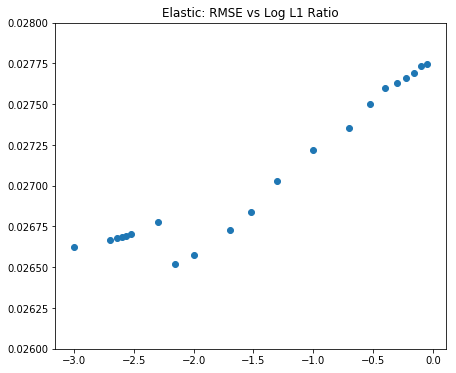

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))

elastic_rmses = [] 
log_ratios = []

for ele in alphs:
    elastic_object = ElasticNetCV(l1_ratio = ele, alphas = lambdas, cv=kfold5)
    elastic = elastic_object.fit(X_trains, y_trains)
    elastic_rmses.append(scoreRMSE(elastic, X_trains, y_trains))
    log_ratios.append(math.log10(ele))
    
ax.set_ylim([0.026,0.028])
ax.scatter(log_ratios, elastic_rmses)
ax.set_title("Elastic: RMSE vs Log L1 Ratio");
l1_r = 10 ** log_ratios[elastic_rmses.index(min(elastic_rmses))]
l1_r

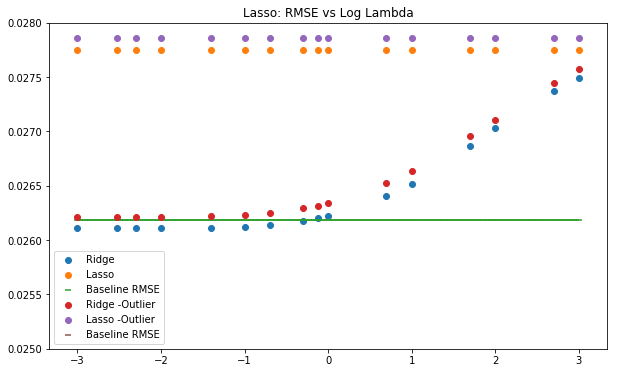

In [57]:
# NOTE: NEED TO CROSS VALIDATE

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ridge_rmses = [] 
log_lambdas = []

for ele in lambdas:
    ridge_object = Ridge(alpha=ele)
    ridge = ridge_object.fit(X_trains, y_trains)
    ridge_rmses.append(scoreRMSE(ridge, X_trains, y_trains))
    log_lambdas.append(math.log10(ele))
#ax.set_ylim([0.026,0.0275])
ax.scatter(log_lambdas, ridge_rmses, label="Ridge")

ax.set_title("Ridge: RMSE vs Log Lambda");
#l1_r = 10 ** log_ratios[elastic_rmses.index(min(elastic_rmses))]
#l1_r
#ax.set_ylim((0.2,0.3))

lasso_rmses = [] 

for ele in lambdas:
    lasso_object = Lasso(alpha=ele)
    lasso = lasso_object.fit(X_trains, y_trains)
    lasso_rmses.append(scoreRMSE(lasso, X_trains, y_trains))
    
#ax.set_ylim([0.0279,0.0280])
ax.scatter(log_lambdas, lasso_rmses, label="Lasso")
ax.set_title("Lasso: RMSE vs Log Lambda"); 

xs = np.linspace(-3,3, 200)
baseline_no_outlier = scoreRMSE(lin_Reg_out,X_trains, y_trains)
horiz_line_data = np.array([baseline_no_outlier for i in range(len(xs))])
ax.scatter(xs, horiz_line_data, marker='_', label="Baseline RMSE")
ax.set_ylim([0.0250,0.0280]);
ax.legend();
# NOTE: L2 ERROR IS SQUARED, Should presence of outlier affect it?



## NOO OUTLIER
# NOTE: NEED TO CROSS VALIDATE

#sfig, ax = plt.subplots(1, 1, figsize=(10,6))

ridge_rmses = [] 
log_lambdas = []

for ele in lambdas:
    ridge_object = Ridge(alpha=ele)
    ridge = ridge_object.fit(X_train_, y_train_)
    ridge_rmses.append(scoreRMSE(ridge, X_train_, y_train_))
    log_lambdas.append(math.log10(ele))
#ax.set_ylim([0.026,0.0275])
ax.scatter(log_lambdas, ridge_rmses, label="Ridge -Outlier")

ax.set_title("Ridge: RMSE vs Log Lambda");
#l1_r = 10 ** log_ratios[elastic_rmses.index(min(elastic_rmses))]
#l1_r
#ax.set_ylim((0.2,0.3))

lasso_rmses = [] 

for ele in lambdas:
    lasso_object = Lasso(alpha=ele)
    lasso = lasso_object.fit(X_train_, y_train_)
    lasso_rmses.append(scoreRMSE(lasso, X_train_, y_train_))
    
#ax.set_ylim([0.0279,0.0280])
ax.scatter(log_lambdas, lasso_rmses, label="Lasso -Outlier")
ax.set_title("Lasso: RMSE vs Log Lambda"); 

xs = np.linspace(-3,3, 200)
baseline_no_outlier = scoreRMSE(lin_Reg_out,X_train_, y_train_)
horiz_line_data = np.array([baseline_no_outlier for i in range(len(xs))])
ax.scatter(xs, horiz_line_data, marker='_', label="Baseline RMSE")
ax.set_ylim([0.0250,0.0280]);
ax.legend();
# NOTE: L2 ERROR IS SQUARED, Should presence of outlier affect it?



0.001

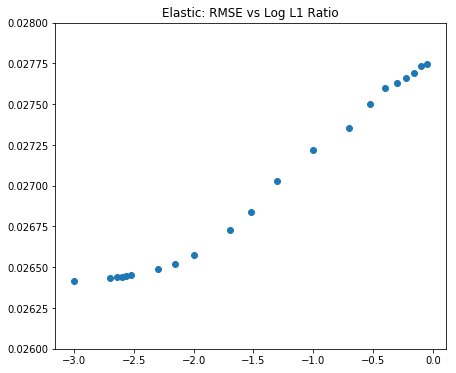

In [61]:
# Note fix two lists of same name
lambda_2 = lambdas[ridge_rmses.index(min(ridge_rmses))]
lambda_1 = lambdas[lasso_rmses.index(min(lasso_rmses))]

fig, ax = plt.subplots(1, 1, figsize=(7,6))

elastic_rmses = [] 
log_ratios = []

for ele in alphs:
    elastic_object = ElasticNetCV(l1_ratio = ele, alphas = [lambda_1,lambda_2], cv=kfold5)
    elastic = elastic_object.fit(X_trains, y_trains)
    elastic_rmses.append(scoreRMSE(elastic, X_trains, y_trains))
    log_ratios.append(math.log10(ele))
    
ax.set_ylim([0.026,0.028])
ax.scatter(log_ratios, elastic_rmses)
ax.set_title("Elastic: RMSE vs Log L1 Ratio");
l1_r = 10 ** log_ratios[elastic_rmses.index(min(elastic_rmses))]
l1_r


In [45]:
# NOTE: NEED TO CROSS VALIDATE

#sfig, ax = plt.subplots(1, 1, figsize=(10,6))

ridge_rmses = [] 
log_lambdas = []

for ele in lambdas:
    ridge_object = Ridge(alpha=ele)
    ridge = ridge_object.fit(X_train, y_train)
    ridge_rmses.append(scoreRMSE(ridge, X_train, y_train))
    log_lambdas.append(math.log10(ele))
#ax.set_ylim([0.026,0.0275])
ax.scatter(log_lambdas, ridge_rmses, label="Ridge")

ax.set_title("Ridge: RMSE vs Log Lambda");
#l1_r = 10 ** log_ratios[elastic_rmses.index(min(elastic_rmses))]
#l1_r
#ax.set_ylim((0.2,0.3))

lasso_rmses = [] 

for ele in lambdas:
    lasso_object = Lasso(alpha=ele)
    lasso = lasso_object.fit(X_train, y_train)
    lasso_rmses.append(scoreRMSE(lasso, X_train, y_train))
    
#ax.set_ylim([0.0279,0.0280])
ax.scatter(log_lambdas, lasso_rmses, label="Lasso")
ax.set_title("Lasso: RMSE vs Log Lambda"); 

xs = np.linspace(-3,3, 200)
baseline_no_outlier = scoreRMSE(lin_Reg_out,X_train, y_train)
horiz_line_data = np.array([baseline_no_outlier for i in range(len(xs))])
ax.scatter(xs, horiz_line_data, marker='_', label="Baseline RMSE")
ax.set_ylim([0.0250,0.0280]);
ax.legend();
# NOTE: L2 ERROR IS SQUARED, Should presence of outlier affect it?


In [ ]:

# #elastic
# FIX
elastic_rmses = [] 
log_ratios = []


elastic_tobject = ElasticNetCV(l1_ratio = l1_r, alphas = ele, cv=kfold5, random_state=150)
elastict = elastic_tobject.fit(X_trains, y_trains)
elastic_rmses.append(scoreRMSE(elastict, X_trains, y_trains))
log_ratios.append(math.log10(ele))
    
ax.set_ylim([0.026,0.028])
ax.scatter(log_ratios, elastic_rmses)
ax.set_title("Elastic: RMSE vs Log L1 Ratio");

In [103]:
lr_elastic_out.l1_ratio

[0.001,
 0.002,
 0.0023,
 0.0025,
 0.0027,
 0.003,
 0.005,
 0.007,
 0.01,
 0.02,
 0.03,
 0.05,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9]

In [99]:
print("Training RMSE: ", scoreRMSE(lr_elastic_out, X_train.loc[non_outliers], y_train.loc[non_outliers]))
predictions = lr_elastic_out.predict(X_test)

# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("basic_elastic_outlier.csv", index=False)
e

Training RMSE:  0.026824027536333096
